In [7]:
import json

file_path = "E:\\term2\\Reddit-Realmadrid100.json"

with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
data

[{'Position': '1',
  'Comment': 'Barcelona: Real Madrid buys referees!\n\nReal Madrid: Barcelona buys referees!\n\nEvery other Spanish club: Guys, guys, you both buy referees',
  'Thread Link': '',
  'Comment Author': 'OleoleCholoSimeone',
  'Comment Author Link': 'https://www.reddit.com/user/OleoleCholoSimeone/',
  'Comment Time': '4 days ago',
  'Comment Upvotes': '25',
  'Subreddit': 'r/soccer',
  'Subreddit Link': 'https://www.reddit.com/r/soccer/',
  'Post Title': '',
  'Post Link': '',
  'Post Time': '4 days ago',
  'Post Upvotes': '2.3K',
  'Post Comments': '568'},
 {'Position': '2',
  'Comment': 'In Real Madrid, we were forced by contract to say that the best was Cristiano\n\nNo way this is true right???',
  'Thread Link': '',
  'Comment Author': 'Dancingwith_Death',
  'Comment Author Link': 'https://www.reddit.com/user/Dancingwith_Death/',
  'Comment Time': '1 mo. ago',
  'Comment Upvotes': '42',
  'Subreddit': 'r/soccer',
  'Subreddit Link': 'https://www.reddit.com/r/soccer/'

In [8]:
reduced_data = []

for i in data:
    reduced_i = {'username': i['Comment Author'], 'text': i['Comment']}
    reduced_data.append(reduced_i)

# Now, reduced_data contains only the 'username' and 'text' fields of each tweet
len(reduced_data)

100

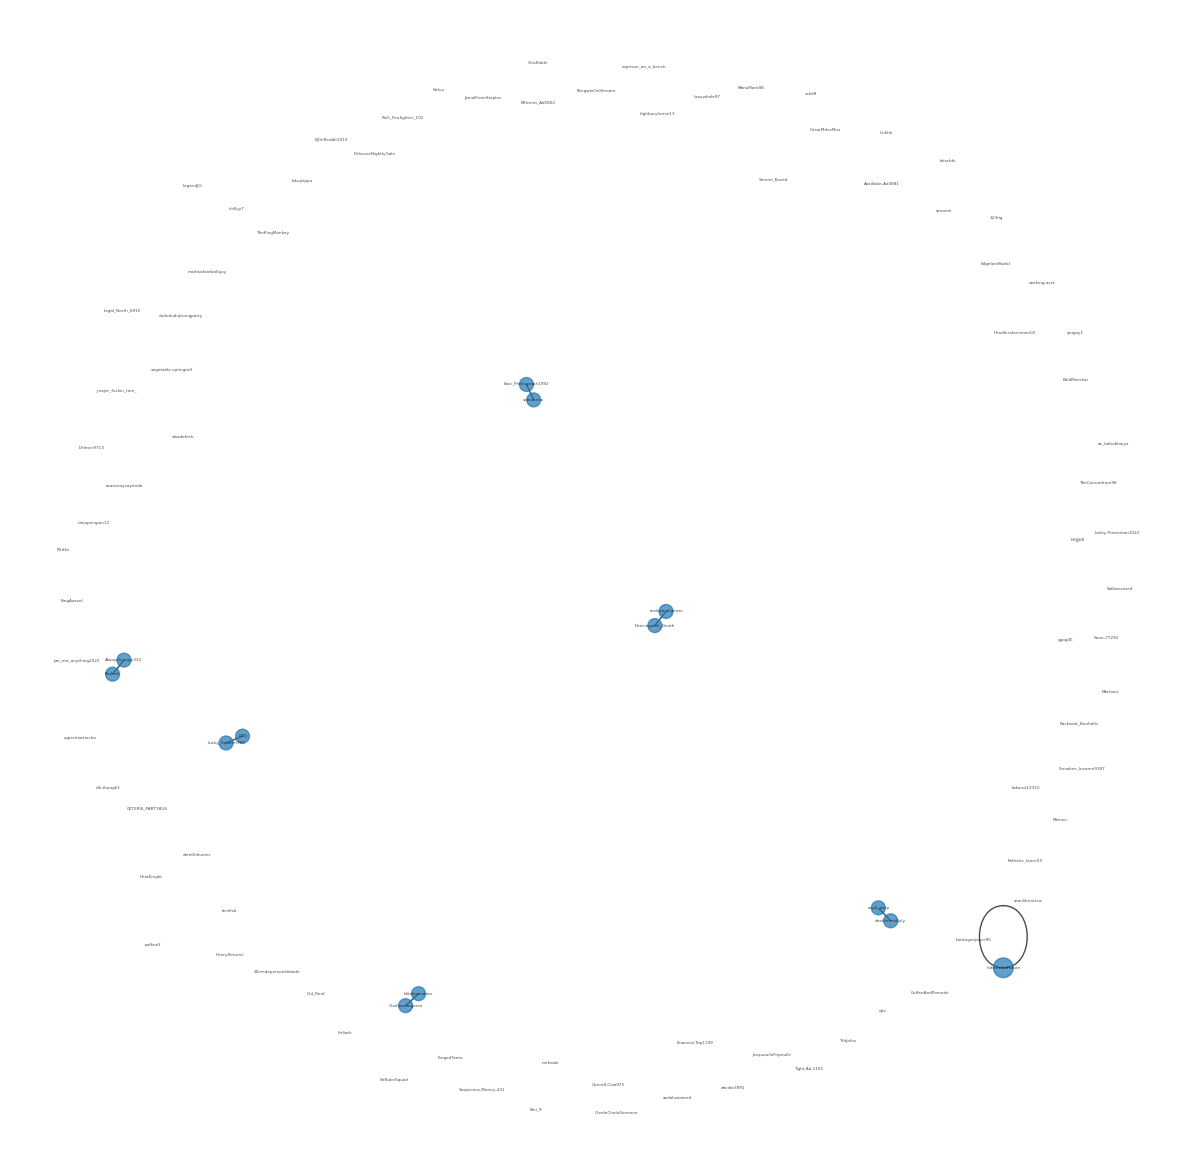

In [9]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Preprocess and vectorize the text
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([i['text'] for i in reduced_data])

# Create a graph
G = nx.Graph()

# Add nodes (filtered to exclude items with missing 'username')
for i in reduced_data:
    if 'username' in i and i['username'] is not None:
        G.add_node(i['username'])


# Add edges based on content similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
threshold = 0.3  # Define your threshold
for i, username1 in enumerate(i['username'] for i in reduced_data):
    for j, username2 in enumerate(i['username'] for i in reduced_data):
        if i < j and similarity_matrix[i, j] > threshold:
            if username1 is not None and username2 is not None:
                G.add_edge(username1, username2)


import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))  # Increase the size of the plot

# Compute the degree of each node (number of connections)
degrees = dict(G.degree())

# Draw the network
nx.draw_networkx(G, 
                 node_size=[v * 100 for v in degrees.values()],  # Node size based on degree
                 labels={node: node for node in G.nodes()},  # Add labels to nodes
                 font_size=3,  # Adjust font size
                 alpha=0.7,  # Node transparency
                 with_labels=True)

plt.axis('off')
plt.show()